## Load the dataset and create the medium

In [379]:
import cobra
model = cobra.io.load_json_model("H:/ROBOT_SCIENTIST/E_coli/iML1515.json")
model

Name,iML1515
Memory address,207b3d76fc8
Number of metabolites,1877
Number of reactions,2712
Number of genes,1516
Number of groups,0
Objective expression,1.0*BIOMASS_Ec_iML1515_core_75p37M - 1.0*BIOMASS_Ec_iML1515_core_75p37M_reverse_35685
Compartments,"cytosol, extracellular space, periplasm"


In [582]:
import pandas as pd

strain = "WT"
replication = "no_replicates"
gr_column= "mv_mu_max"
# replication = "replicates"
# gr_column= "mv_mu_max"
# replication = "post_replicates"
# gr_column= "mv_mu_max_mean"
experiment = "mediabotJLF2"
# replication = "post_replicates"
# gr_column= "mv_mu_max_mean"
# replication = "replicates"
# gr_column= "mv_mu_max"
exp_data_path = f"H:/ROBOT_SCIENTIST/E_coli/Growth_rates/2025-10-31-27/processed/{replication}/{experiment}/AMN_dataset/"
# exp_data_path = f"H:/ROBOT_SCIENTIST/E_coli/Growth_rates/2025-10-31-27/processed/{replication}_STRAINS/{strain}/AMN_dataset/"
exp_data = pd.read_csv(exp_data_path + "df_flux.csv")
exp_data

,EX_ade_e,EX_ca2_e,EX_cl_e,EX_cobalt2_e,EX_cu2_e,EX_fe3_e,EX_gal_e,EX_glc__D_e,EX_glyc_e,EX_h2o_e,...,EX_ni2_e,EX_o2_e,EX_pi_e,EX_so4_e,EX_succ_e,EX_sucr_e,EX_tungs_e,EX_ura_e,EX_zn2_e,mv_mu_max
0,0.000000,0.027273,2.509953,0.000070,0.000108,0.004652,0.0,2.018408,0.0,1000.0,...,1000.0,1000.0,6.360911,0.091011,0.000000,0.0,1000.0,0.000000,0.000560,0.404461
1,0.000000,0.026087,2.400825,0.000067,0.000104,0.004450,0.0,1.930651,0.0,1000.0,...,1000.0,1000.0,6.084349,0.087054,0.000000,0.0,1000.0,0.000000,0.000536,0.410725
2,0.000000,0.026087,2.400825,0.000067,0.000104,0.004450,0.0,1.930651,0.0,1000.0,...,1000.0,1000.0,6.084349,0.087054,0.000000,0.0,1000.0,0.000000,0.000536,0.404177
3,0.000000,0.020000,1.840632,0.000051,0.000079,0.003412,0.0,1.480166,0.0,1000.0,...,1000.0,1000.0,4.664668,0.066741,0.000000,0.0,1000.0,0.000000,0.000411,0.255915
4,0.000000,0.020339,1.871829,0.000052,0.000081,0.003469,0.0,1.505253,0.0,1000.0,...,1000.0,1000.0,4.743730,0.067872,0.000000,0.0,1000.0,0.000000,0.000418,0.260232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.018781,0.020690,1.904102,0.000053,0.000082,0.003529,0.0,0.000000,0.0,1000.0,...,1000.0,1000.0,4.825518,0.069042,2.376687,0.0,1000.0,0.013782,0.000425,0.280332
63,0.018463,0.020339,1.871829,0.000052,0.000081,0.003469,0.0,0.000000,0.0,1000.0,...,1000.0,1000.0,4.743730,0.067872,2.336404,0.0,1000.0,0.013548,0.000418,0.254888
64,0.013124,0.014458,1.330578,0.000037,0.000057,0.002466,0.0,0.000000,0.0,1000.0,...,1000.0,1000.0,3.372049,0.048247,1.660817,0.0,1000.0,0.009631,0.000297,0.208505
65,0.012667,0.013953,1.284162,0.000036,0.000055,0.002380,0.0,0.000000,0.0,1000.0,...,1000.0,1000.0,3.254419,0.046564,1.602882,0.0,1000.0,0.009295,0.000287,0.199069


In [583]:
preds = []
status = []
i = 0
for _, row in exp_data.iterrows():
    with model:
        # Set the medium according to the experimental data
        medium = model.medium.copy()
        for rxn_id in medium:
            medium[rxn_id] = 0.0  # Set high uptake rates for all exchange reactions
        for rxn_id in exp_data.columns:
            if rxn_id != gr_column:
                medium[rxn_id] = row.get(rxn_id, 0.0)  # Set uptake rates based on experimental data
        model.medium = medium
        # Perform FBA
        # model.objective = 'BIOMASS_Ec_iML1515_WT_75p37M'
        model.objective = 'BIOMASS_Ec_iML1515_core_75p37M'                
        solution = model.optimize()        
        preds.append(solution.objective_value)
        status.append(solution.status  == 'optimal')

        # solution = model.slim_optimize()
        # preds.append(solution)
        # status.append(solution != float('nan'))

        # obj = 'BIOMASS_Ec_iML1515_core_75p37M'
        # pfba_solution =cobra.flux_analysis.pfba(model, 
        #                                         objective={model.reactions.BIOMASS_Ec_iML1515_core_75p37M:1.0})        
        # preds.append(pfba_solution.fluxes['BIOMASS_Ec_iML1515_core_75p37M'])
        # status.append(pfba_solution.fluxes['BIOMASS_Ec_iML1515_core_75p37M'] != float('nan'))
        
        # obj = 'BIOMASS_Ec_iML1515_WT_75p37M'
        # pfba_solution =cobra.flux_analysis.pfba(model, 
        #                                         objective={model.reactions.BIOMASS_Ec_iML1515_WT_75p37M:1.0})        
        # preds.append(pfba_solution.fluxes['BIOMASS_Ec_iML1515_WT_75p37M'])
        # status.append(pfba_solution.fluxes['BIOMASS_Ec_iML1515_WT_75p37M'] != float('nan'))
        




c:\Users\rh2310\projects\amn_release\.env\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


In [584]:
# remove outtiers from predictions
import numpy as np
preds_array = np.array(preds)
status_array = np.array(status)
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
q1 = np.percentile(preds_array, 25)
q3 = np.percentile(preds_array, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

filtered_preds = [pred if lower_bound <= pred <= upper_bound else np.nan for pred in preds_array]
filtered_status = [status_array[i] if lower_bound <= preds_array[i] <= upper_bound else False for i in range(len(preds_array))]


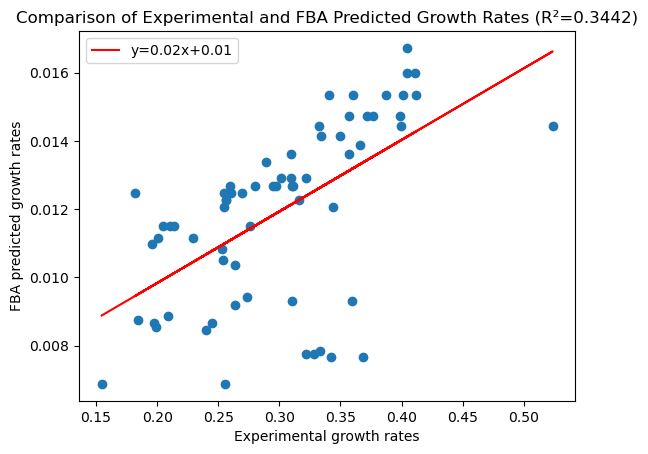

In [585]:
from matplotlib import pyplot as plt
# masks = [s == 'optimal' for s in status]
masks = [s for s in filtered_status]
plt.scatter(exp_data[gr_column][masks], [p for p, m in zip(filtered_preds, masks) if m])
# regression line

y = np.array([p for p, m in zip(filtered_preds, masks) if m])
x = np.array(exp_data[gr_column][masks])
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red', label=f'y={m:.2f}x+{b:.2f}')
# find R2
correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
plt.xlabel("Experimental growth rates")
plt.ylabel("FBA predicted growth rates")
plt.title(f"Comparison of Experimental and FBA Predicted Growth Rates (R²={r_squared:.4f})")
plt.legend()
plt.show()

In [586]:
# uptake_column = 'EX_gal_e'
# # Sort exp_data by mv_mu_max column
# exp_data_sorted = exp_data.sort_values(by=gr_column).reset_index(drop=True)

# # Create figure with dual y-axes
# fig, ax1 = plt.subplots(figsize=(10, 6))

# # Plot normalized glucose uptake on the first y-axis
# color = 'tab:blue'
# ax1.set_xlabel(f'Sample Index (sorted by {gr_column})')
# ax1.set_ylabel('Normalized Glucose Uptake', color=color)
# ax1.plot(exp_data_sorted["EX_ser__L_e"] / exp_data_sorted["EX_ser__L_e"].max(), 
#          color='yellow', marker='o', label='EX_ser__L_e uptake (normalized)')
# ax1.plot(exp_data_sorted[uptake_column] / exp_data_sorted[uptake_column].max(), 
#          color=color, marker='o', label=f'{uptake_column} uptake (normalized)')

# ax1.tick_params(axis='y', labelcolor=color)
# ax1.grid(True, alpha=0.3)

# # Create second y-axis for mv_mu_max
# ax2 = ax1.twinx()
# color = 'tab:orange'
# ax2.set_ylabel(gr_column, color=color)
# ax2.plot(exp_data_sorted[gr_column], color=color, marker='s', label=gr_column)
# ax2.tick_params(axis='y', labelcolor=color)

# # Add title
# plt.title(f'Normalized Glucose Uptake and Growth Rate (sorted by {gr_column})')

# # Add legends
# ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')

# fig.tight_layout()
# plt.show()

In [587]:
exp_data.columns

Index(['EX_ade_e', 'EX_ca2_e', 'EX_cl_e', 'EX_cobalt2_e', 'EX_cu2_e',
       'EX_fe3_e', 'EX_gal_e', 'EX_glc__D_e', 'EX_glyc_e', 'EX_h2o_e',
       'EX_h_e', 'EX_k_e', 'EX_mg2_e', 'EX_mn2_e', 'EX_mobd_e', 'EX_na1_e',
       'EX_nh4_e', 'EX_ni2_e', 'EX_o2_e', 'EX_pi_e', 'EX_so4_e', 'EX_succ_e',
       'EX_sucr_e', 'EX_tungs_e', 'EX_ura_e', 'EX_zn2_e', 'mv_mu_max'],
      dtype='object')

In [588]:
# Sort columns by their max values (excluding the growth rate column if it's in the data)
# Get max values for each column
max_values = exp_data.max()

# Sort columns by max value in descending order
sorted_columns = max_values.sort_values(ascending=True).index.tolist()
sorted_columns.remove(gr_column)  # Remove growth rate column if present
# Reorder exp_data columns
exp_data_sorted_cols = exp_data[sorted_columns]

print(f"Total columns: {len(sorted_columns)}")
print(f"Columns sorted by max value: {sorted_columns[:10]}...")  # Show first 10

Total columns: 26
Columns sorted by max value: ['EX_gal_e', 'EX_glyc_e', 'EX_mn2_e', 'EX_cobalt2_e', 'EX_cu2_e', 'EX_zn2_e', 'EX_fe3_e', 'EX_ura_e', 'EX_ade_e', 'EX_ca2_e']...


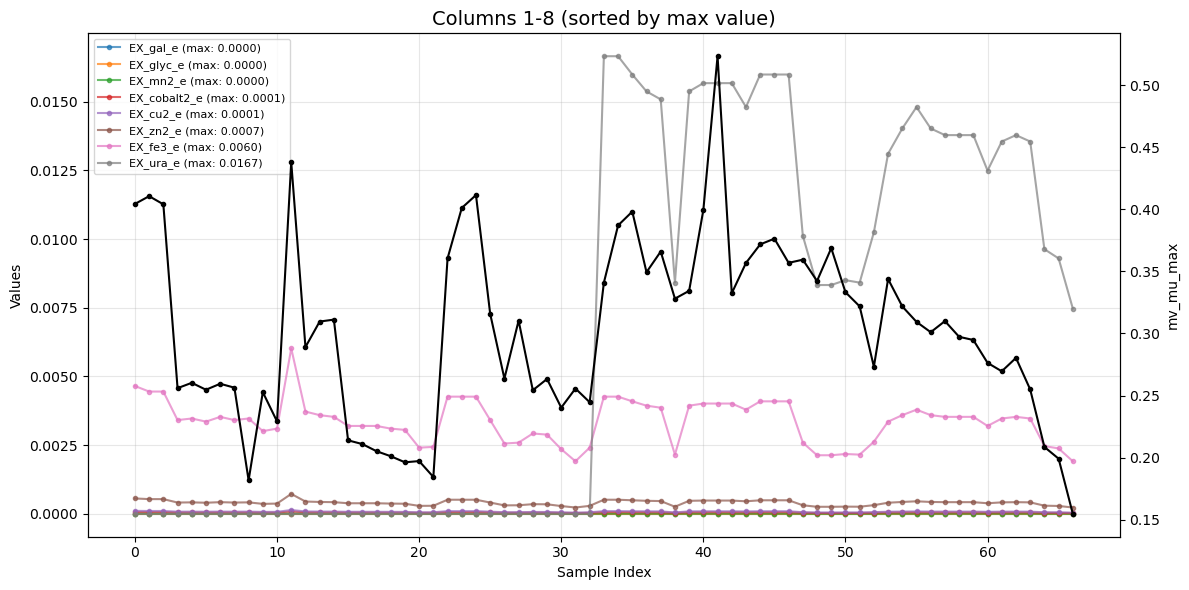

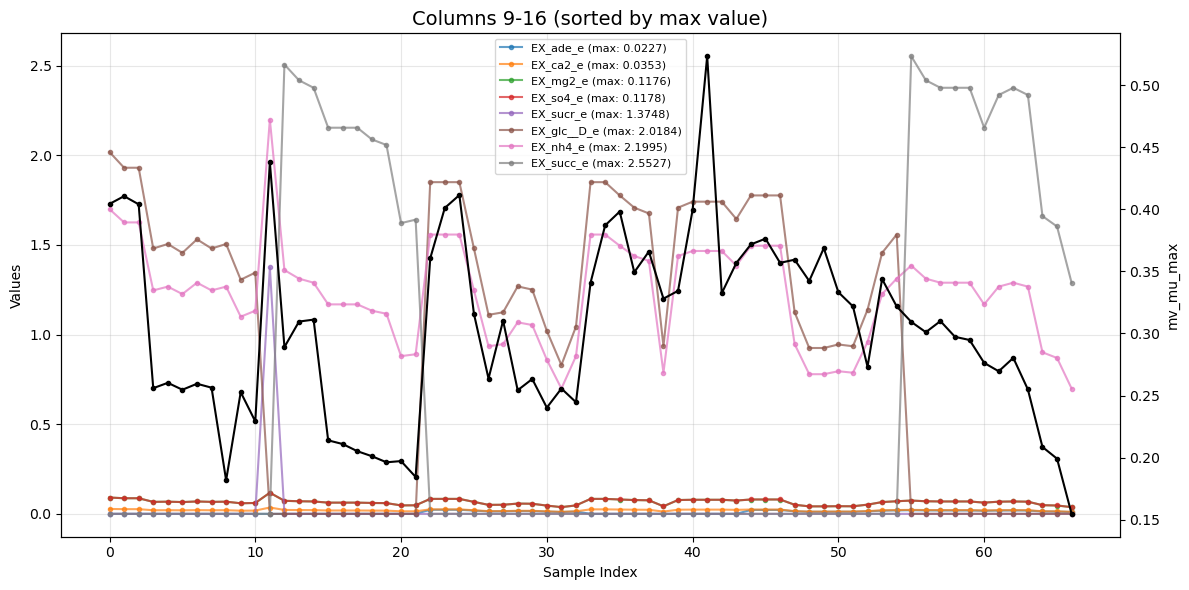

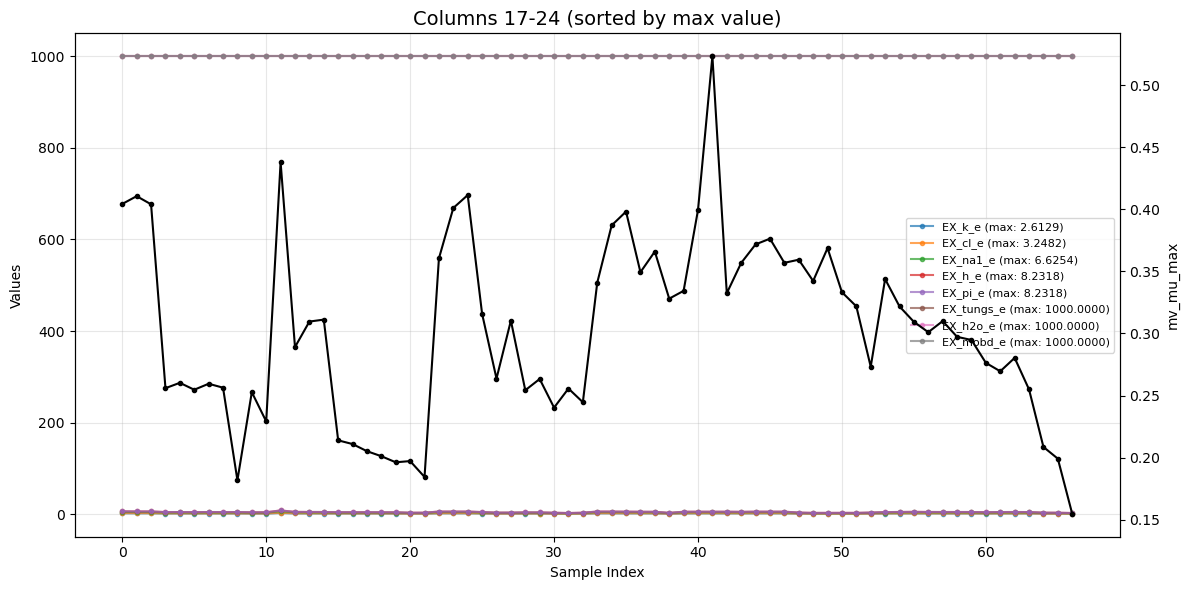

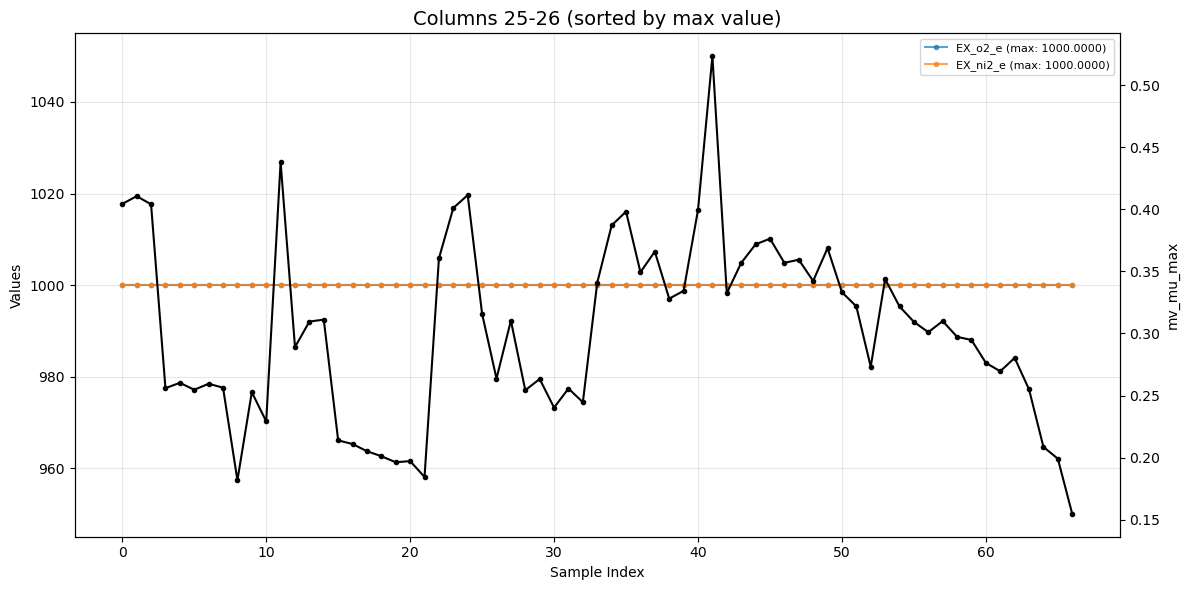

Created 4 figures with 8 series each


In [589]:
# Plot all columns, 6 series per figure on the same axis
import math

n_cols_per_fig = 8
total_cols = len(sorted_columns)
n_figures = math.ceil(total_cols / n_cols_per_fig)

for fig_idx in range(n_figures):
    # Determine which columns to plot in this figure
    start_idx = fig_idx * n_cols_per_fig
    end_idx = min(start_idx + n_cols_per_fig, total_cols)
    cols_to_plot = sorted_columns[start_idx:end_idx]
    
    # Create single figure with one axis
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    
    # Plot each column on the same axis
    for col in cols_to_plot:
        ax.plot(exp_data_sorted_cols[col], marker='o', markersize=3, 
                label=f'{col} (max: {max_values[col]:.4f})', alpha=0.7)
    
    ax.set_ylabel('Values')
    ax.set_xlabel('Sample Index')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='best', fontsize=8)
    ax.set_title(f'Columns {start_idx+1}-{end_idx} (sorted by max value)', fontsize=14)

    ax2 = ax.twinx()
    color = 'black'
    ax2.set_ylabel(gr_column, color=color)
    ax2.plot(exp_data[gr_column], color=color, marker='o', markersize=3,  label=gr_column)
    ax2.tick_params(axis='y', labelcolor=color)
    
    fig.tight_layout()
    plt.show()
    
print(f"Created {n_figures} figures with {n_cols_per_fig} series each")

In [590]:
import cobra
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def run(per_strain: bool = True,
        strain:str = "WT",
        replication:str = "no_replicates",
        gr_column:str = "mv_mu_max",
        experiment:str = "mediabotJLF2",
        ):
    model = cobra.io.load_json_model("H:/ROBOT_SCIENTIST/E_coli/iML1515.json")
    
    if per_strain:
        exp_data_path = f"H:/ROBOT_SCIENTIST/E_coli/Growth_rates/2025-10-31-27/processed/{replication}_STRAINS/{strain}/AMN_dataset/"
    else:
        exp_data_path = f"H:/ROBOT_SCIENTIST/E_coli/Growth_rates/2025-10-31-27/processed/{replication}/{experiment}/AMN_dataset/"
    # 
    exp_data = pd.read_csv(exp_data_path + "df_flux.csv")
    preds = []
    status = []
    for _, row in exp_data.iterrows():
        with model:
            # Set the medium according to the experimental data
            medium = model.medium.copy()
            for rxn_id in medium:
                medium[rxn_id] = 0.0  # Set high uptake rates for all exchange reactions
            for rxn_id in exp_data.columns:
                if rxn_id != gr_column:
                    medium[rxn_id] = row.get(rxn_id, 0.0)  # Set uptake rates based on experimental data
            model.medium = medium
            # Perform FBA
            # model.objective = 'BIOMASS_Ec_iML1515_WT_75p37M'
            model.objective = 'BIOMASS_Ec_iML1515_core_75p37M'                
            solution = model.optimize()        
            preds.append(solution.objective_value)
            status.append(solution.status  == 'optimal')
    #
    # remove outtiers from predictions
    preds_array = np.array(preds)
    status_array = np.array(status)
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    percentile_lower = 25
    percentile_upper = 75
    q1 = np.percentile(preds_array, percentile_lower)
    q3 = np.percentile(preds_array, percentile_upper)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    filtered_preds = [pred if lower_bound <= pred <= upper_bound else np.nan for pred in preds_array]
    filtered_status = [status_array[i] if lower_bound <= preds_array[i] <= upper_bound else False for i in range(len(preds_array))]
    #
    masks = [s for s in filtered_status]
    plt.scatter(exp_data[gr_column][masks].tolist(), 
                [p for p, m in zip(filtered_preds, masks) if m])
    # regression line

    y = np.array([p for p, m in zip(filtered_preds, masks) if m])
    x = np.array(exp_data[gr_column][masks])
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color='red', label=f'y={m:.2f}x+{b:.2f}')
    # find R2
    correlation_matrix = np.corrcoef(x, y)
    correlation_xy = correlation_matrix[0,1]
    r_squared = correlation_xy**2
    plt.xlabel("Experimental growth rates")
    plt.ylabel("FBA predicted growth rates")
    if per_strain:
        subtitle= (f"Strain:{strain}, replication:{replication.replace('_', ' ')} "
                   f"\n Data points n:{sum(masks)}, Q1:%{percentile_lower}-Q2:%{percentile_upper}")
    else:
        subtitle= (f"experiment:{experiment}, replication:{replication.replace('_', ' ')} "
                   f"\n Data points n:{sum(masks)}, Q1:%{percentile_lower}-Q2:%{percentile_upper}")
    plt.title(f"Comparison of Experimental and FBA Predicted Growth Rates (R²={r_squared:.4f}) \n"
              f"{subtitle}"
              )
    plt.legend()
    plt.show()





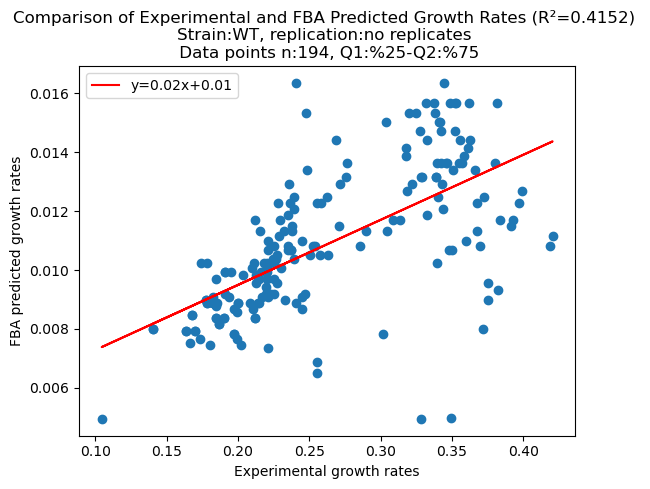

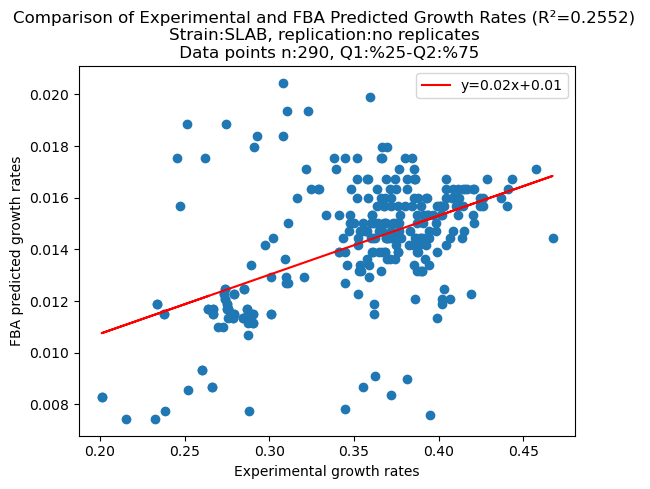

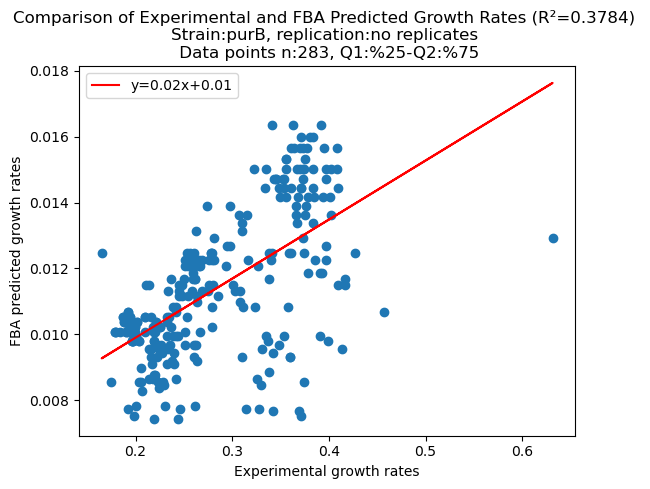

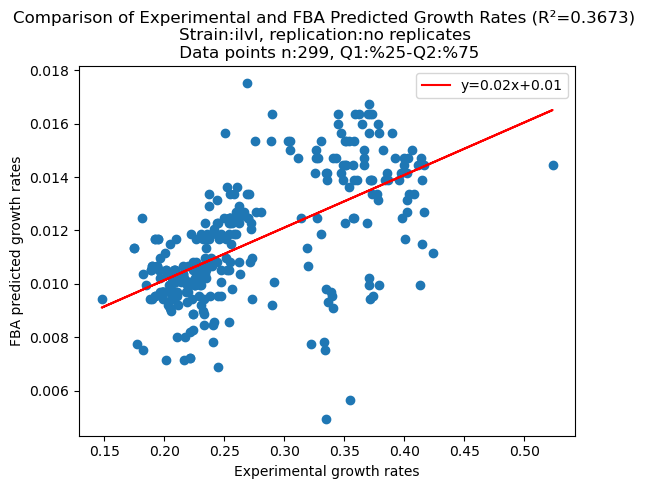

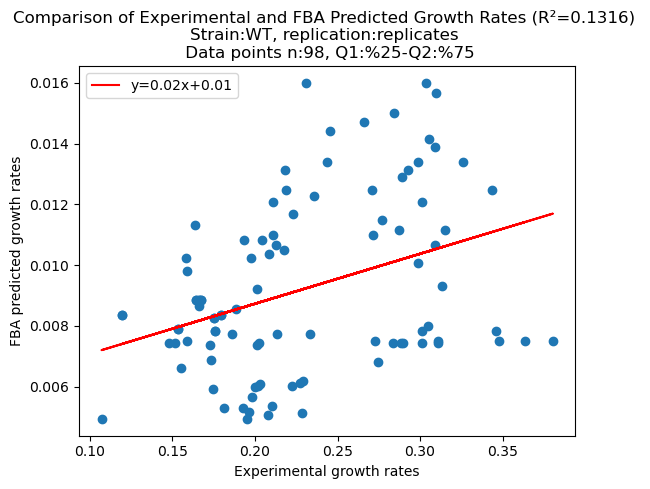

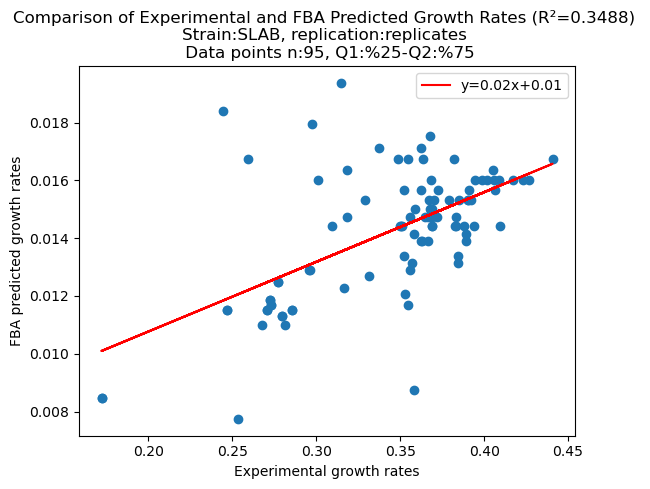

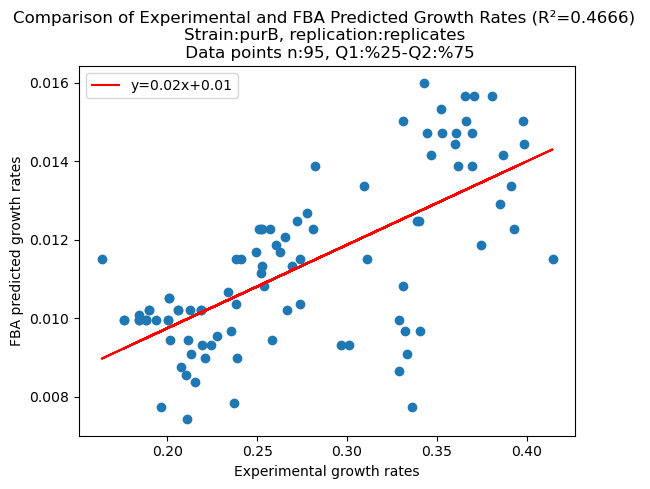

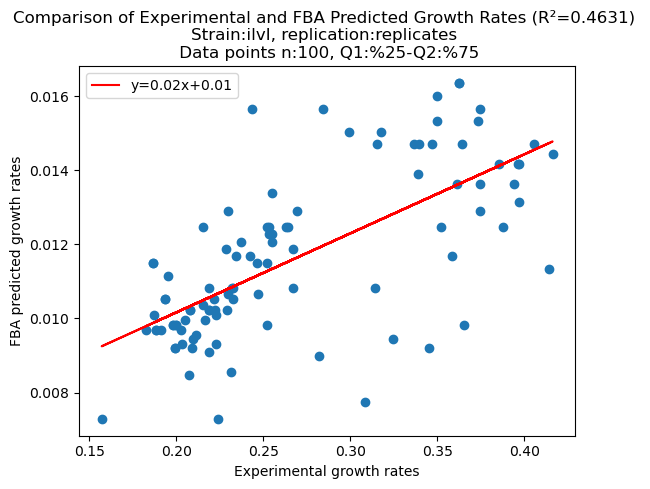

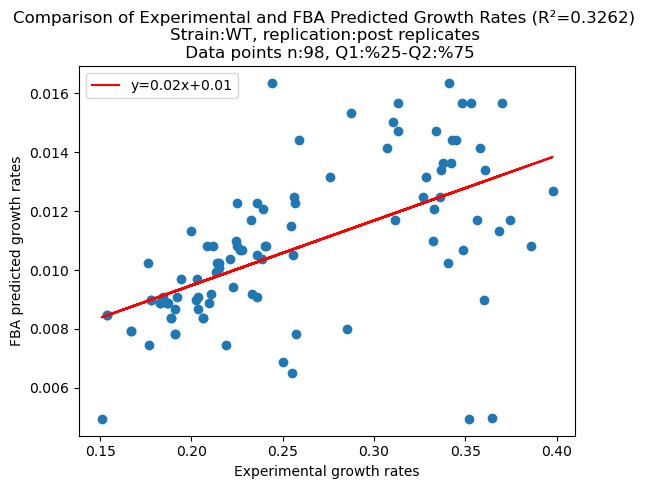

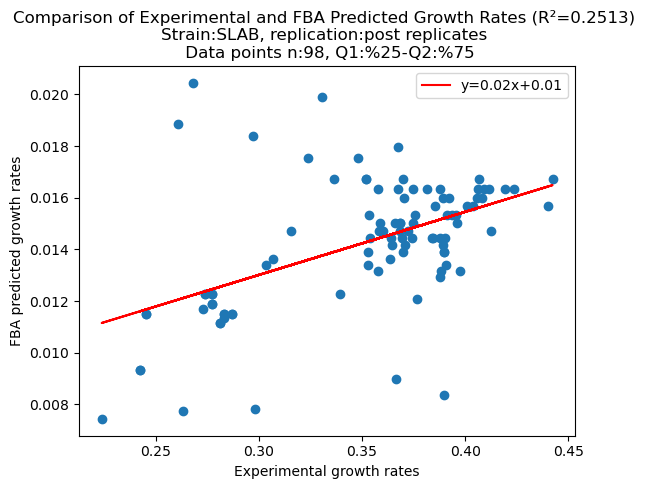

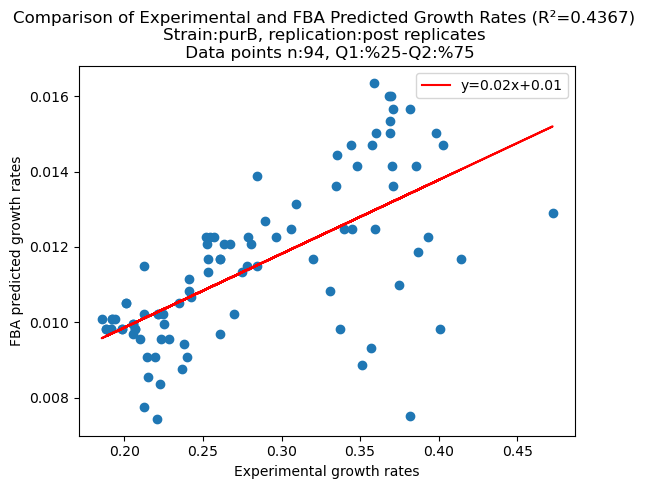

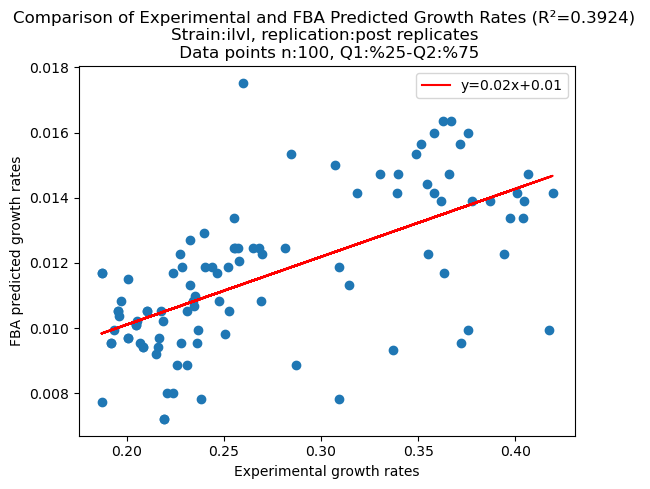

In [591]:
strains = ["WT", "SLAB", "purB", "ilvI"]
experiments = ["mediabotJLF".join(["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "14"])]
replications = ["no_replicates", "replicates", "post_replicates"]
gr_columns = ["mv_mu_max", "mv_mu_max", "mv_mu_max_mean"]
for replication, gr_column in zip(replications, gr_columns):
    for strain in strains:
        run(per_strain=True,
            strain=strain,
            replication=replication,
            gr_column=gr_column)

In [592]:
model.medium

{'EX_pi_e': 1000.0,
 'EX_co2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_zn2_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_ca2_e': 1000.0,
 'EX_ni2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_sel_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_tungs_e': 1000.0,
 'EX_slnt_e': 1000.0}